<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
موتور پیشنهاد فیلم
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
به تمرین آخر مبحث پالایش جمعی رسیدیم. در این تمرین داده هایی که در اختیار شما قرار گرفته کاملا تمیز شده و جنبه آموزشی دارند و قرار است مرور کلی بر مفاهیم داشته باشیم. حجم دیتاست فیلم نسبت به دیتاست کوئرا و کتاب خیلی کمتر است و داده های آن نیز همانطور که گفته شد، تر و تمیز و سر راست هستند. هدف از طراحی این تمرین بیشتر از صحت پیش بینی ها و دقت بالا، درک و مرور مفاهیم سیستم های پالایش جمعی است. به امید مفید بودن این تمرین.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
ابتدا کتابخانه های مورد نیاز و مجموعه داده <code>movies-imdb.csv</code> را به نوت بوک اضافه کن.
</font>
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

df = pd.read_csv('imdbMovies1.csv')

df.head(10)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"
5,1,70,3.0,From Dusk Till Dawn (1996)
6,1,101,5.0,Bottle Rocket (1996)
7,1,110,4.0,Braveheart (1995)
8,1,151,5.0,Rob Roy (1995)
9,1,157,5.0,Canadian Bacon (1995)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بررسی داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در سلول های زیر می توانید نگاهی به داده ها داشته باشید و بررسی کنید که داده ها به چه شکل هستند.
</font>
</p>


In [2]:
df.shape

(100776, 4)

In [3]:
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100776 entries, 0 to 100775
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100776 non-null  int64  
 1   movieId  100776 non-null  int64  
 2   rating   100776 non-null  float64
 3   title    100776 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
نمایش داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
بد نیست کمی مصورسازی داده ها داشته باشید. کدهای رسم نمودارها کاملا در نوت بوک هستند و فقط کافی است اجرا کنید.
</font>
</p>


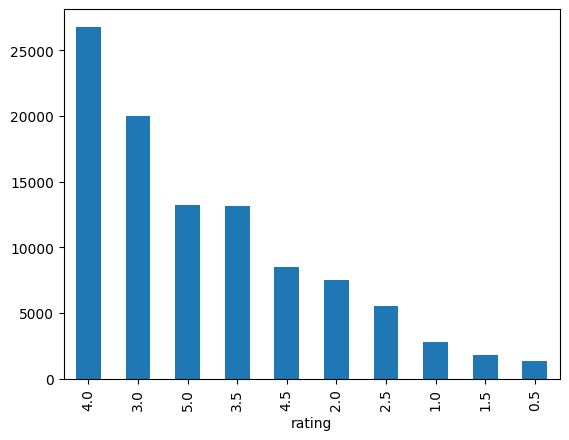

In [5]:
## با اجرای این کد توزیع فراوانی امتیازات داده شده به فیلم ها را میتوانید مشاهده کنید.
df['rating'].value_counts().plot(kind='bar')
plt.show()

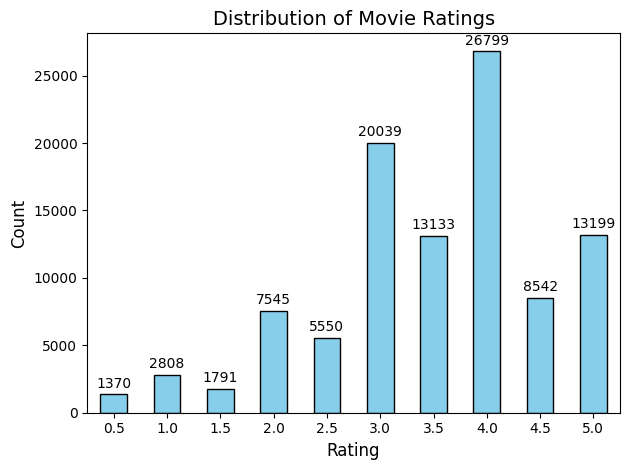

In [6]:
import matplotlib.pyplot as plt

# مقداردهی به شمارش امتیازها و مرتب‌سازی بر اساس امتیاز (index)
rating_counts = df['rating'].value_counts().sort_index()

# رسم نمودار میله‌ای
ax = rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# اضافه کردن عنوان و برچسب‌ها
plt.title('Distribution of Movie Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# نمایش اعداد دقیق روی هر ستون
for i, count in enumerate(rating_counts):
    plt.text(i, count + max(rating_counts)*0.01, str(count), ha='center', va='bottom', fontsize=10)

# چرخش برچسب محور x (در صورت نیاز)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
نمایش داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با اجرای دو سلول زیر، دو توزیع مختلف و معنادار از داده ها بدست خواهید اورد. اولین توزیع، نمایش تعداد رای کاربران به  فیلم هاست اینکه هر کاربر به چند فیلم رای داده است. و دومین توزیع، نمایش اینکه فیلم ها توسط چند کاربر رای داده شده اند. نکته ای که در این دو توزیع وجود دارد، نمود توزیع دم دراز است.
</font>
</p>


In [7]:
unique_movies = df['movieId'].unique()

print("تعداد فیلم‌ها:", len(unique_movies))

تعداد فیلم‌ها: 9724


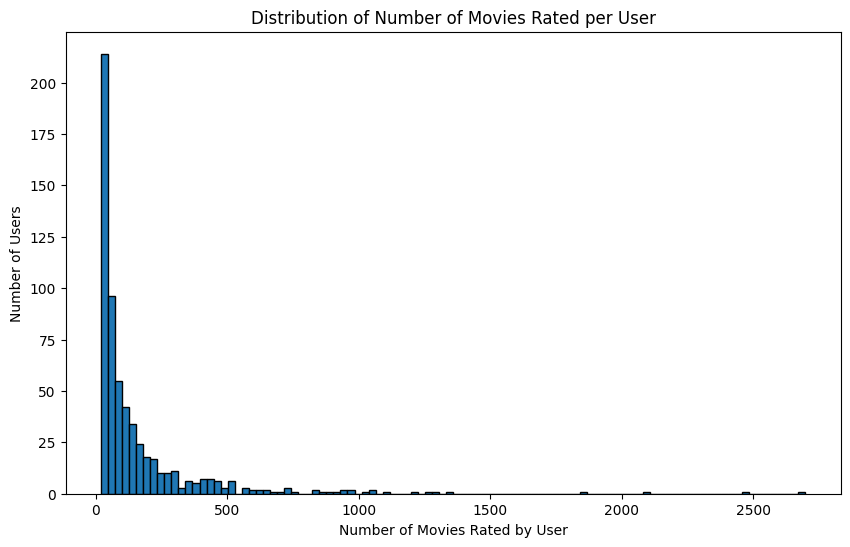

In [8]:
user_rating_counts = df['userId'].value_counts()
plt.figure(figsize=(10,6))
user_rating_counts.plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Number of Movies Rated by User')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Movies Rated per User')
plt.show()

In [9]:
user_rating_counts.sort_values(ascending=True)

,count
userId,
53,20
569,20
576,20
207,20
320,20
...,...
274,1346
448,1864
474,2108


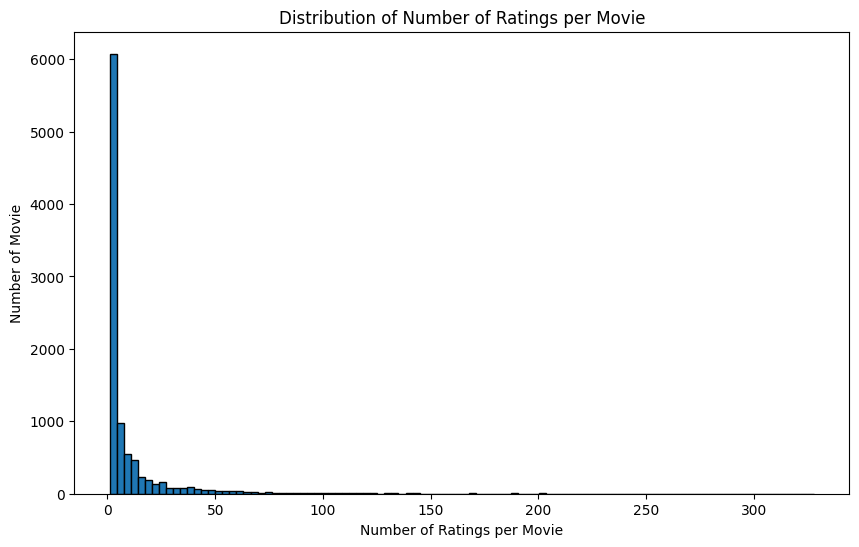

In [10]:
book_rating_counts = df['movieId'].value_counts()
plt.figure(figsize=(10,6))
book_rating_counts.plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movie')
plt.title('Distribution of Number of Ratings per Movie')
plt.show()

In [11]:
df[df['rating'] == 0]

,userId,movieId,rating,title


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
هرس داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
بهتر است در این مرحله کمی داده هارا سر و سامان دهیم و مقداری تمیزکاری داشته باشیم. برای اینکار، در سلول پایین ابتدا داده هارا طوری فیلتر کنید که تنها کاربرانی که حداقل به 5 فیلم رای داده اند باقی بمانند و در مرحله بعد تنها فیلم هایی را نگه دارید که حداقل 10 بار رای داده شده اند. سپس ابعاد دیتافریم جدید را مقایسه کنید.
</font>
</p>


In [12]:
min_user_ratings = 5
min_movie_ratings = 10

user_counts = df['userId'].value_counts()
movie_counts = df['movieId'].value_counts()

users_with_enough_ratings = user_counts[user_counts >= min_user_ratings].index
movies_with_enough_ratings = movie_counts[movie_counts >= min_movie_ratings].index

df = df[df['userId'].isin(users_with_enough_ratings)]
df = df[df['movieId'].isin(movies_with_enough_ratings)]


In [13]:
df.shape

(81058, 4)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
تقسیم داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در مراحل جلوتر قرار است که با معیارهای شباهت مختلف داده هارا شباهت سنجی کنیم پس برای بررسی حدودی عیار هر معیار شباهت سنجی بر روی این داده ها، در سلول زیر داده ها را به train و test تقسیم کنید. دقت کنید که تقسیم به شکل 80-20 باشد و پارامتر stratify را به متد اضافه کنید که توزیع کاربران در داده های آموزش و آزمایش را تقریبا ثابت نگه دارد. اگر این پارامتر را قرار ندهید ممکن است بخشی از کاربران شما در داده های آموزش باشند اما در آزمایش و تست نباشند و ارزیابی را دچار مشکل کند.
</font>
</p>


In [14]:
from sklearn.model_selection import train_test_split

# حذف کاربرانی که فقط یک امتیاز دارند (برای جلوگیری از خطای stratify)
user_counts = df['userId'].value_counts()
users_with_enough_ratings = user_counts[user_counts > 1].index

df_filtered = df[df['userId'].isin(users_with_enough_ratings)]

# تقسیم داده‌ها به train و test
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42, stratify=df_filtered['userId'])


print(f"\nتعداد رکوردهای مجموعه آموزشی: {len(train_data)}")
print(f"تعداد رکوردهای مجموعه آزمایشی: {len(test_data)}")


تعداد رکوردهای مجموعه آموزشی: 64846
تعداد رکوردهای مجموعه آزمایشی: 16212


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
ساخت ماتریس کاربر-آیتم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با توجه به داده های آموزش که در سلول قبل ساختید، ماتریس کاربر-آیتم را بسازید.
</font>
</p>


In [15]:
user_item_matrix = pd.pivot_table(train_data, values='rating', index='userId', columns='movieId', fill_value=0)

In [16]:
user_item_matrix.head(10)

movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,5.0,4.0,0.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_item_matrix.shape

(610, 2268)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
شباهت سنجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
حالا که داده های ما به شکل پیوسته است یکی از معیارهای شباهت که میتوان سراغ آن رفت شباهت کسینوسی است. در سلول زیر ماتریس کاربر-آیتم را با کمک شباهت کسینوسی شباهت سنجی کرده و ماتریس آیتم-آیتم را بوجود آورید.
</font>
</p>


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the user-item matrix to get item-user matrix
item_user_matrix = user_item_matrix.T

# Calculate item-item cosine similarity
item_similarity_cosine = cosine_similarity(item_user_matrix)

# Convert the similarity matrix to a DataFrame
item_similarity_df_cosine = pd.DataFrame(item_similarity_cosine, index=user_item_matrix.columns, columns=user_item_matrix.columns)

print("شکل ماتریس شباهت:", item_similarity_df_cosine.shape)
print("نمونه‌ای از ماتریس شباهت:")
display(item_similarity_df_cosine.head())

شکل ماتریس شباهت: (2268, 2268)
نمونه‌ای از ماتریس شباهت:


movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.338911,0.269031,0.286684,0.295635,0.235304,0.246737,0.344924,0.266736,0.210676,...,0.049396,0.175221,0.135178,0.094350,0.141164,0.052527,0.115972,0.054457,0.106520,0.113692
2,0.338911,1.000000,0.251235,0.248366,0.270153,0.131347,0.066207,0.320026,0.226166,0.102245,...,0.100917,0.139106,0.073133,0.018878,0.177479,0.086446,0.164201,0.043939,0.101666,0.069625
3,0.269031,0.251235,1.000000,0.421687,0.251132,0.269850,0.177978,0.179445,0.220800,0.213981,...,0.000000,0.073403,0.070641,0.017778,0.070855,0.093578,0.106223,0.000000,0.077632,0.000000
5,0.286684,0.248366,0.421687,1.000000,0.261860,0.342638,0.176986,0.219120,0.285868,0.237446,...,0.000000,0.043525,0.036343,0.000000,0.039881,0.048144,0.057615,0.000000,0.039940,0.000000
6,0.295635,0.270153,0.251132,0.261860,1.000000,0.169783,0.111227,0.276442,0.206629,0.142551,...,0.000000,0.167904,0.077780,0.044743,0.131835,0.044158,0.176148,0.000000,0.086156,0.073195


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
پیش بینی امتیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
وقتی داده ها صریح است. یکی از مسائلی که میتوان در دل سیستم های پیشنهاد دهنده حل کرد، پیش بینی احتمال امتیاز کاربر به آیتم دیده نشده است. برای مثال کاربر چند فیلم دیده و به آنها امتیاز داده حالا ما تخمین بزنیم به فیلم x چه امتیازی خواهد داد و براساس آن تصمیم بگیریم که آیا فیلم x را به این کاربر پیشنهاد بدهیم یا خیر؟. در سلول زیر تابعی بنویسید که با دریافت آیدی کاربر و آیدی فیلم، امتیاز احتمالی کاربر به فیلمی که آیدی مربوطه به تابع پاس داده شده است را با توجه به 10 همسایه اطراف پیش بینی کند.
</font>
</p>


In [38]:
user_item_matrix = user_item_matrix.replace(0, np.nan)

In [39]:
def predict_rating_ibcf_with_k(user_id, movie_id, user_item_matrix, item_similarity_df, k=10):
    if user_id not in user_item_matrix.index:
        print(f"کاربر با شناسه {user_id} در ماتریس کاربر-آیتم یافت نشد.")
        return None
    if movie_id not in user_item_matrix.columns:
        print(f"فیلم با شناسه {movie_id} در ماتریس کاربر-آیتم یافت نشد.")
        return None
    if movie_id not in item_similarity_df.index:
        print(f"فیلم با شناسه {movie_id} در ماتریس شباهت آیتم یافت نشد.")
        return None

    similar_movies = item_similarity_df[movie_id].sort_values(ascending=False)
    similar_movies = similar_movies.drop(movie_id)

    # فیلم‌هایی که کاربر به آنها امتیاز داده است (با فرض NaN به جای 0 برای دیدن نشده‌ها)
    user_rated_movies = user_item_matrix.loc[user_id].dropna().index

    similar_movies_rated_by_user = similar_movies[similar_movies.index.isin(user_rated_movies)]
    top_k_similar_movies = similar_movies_rated_by_user.head(k)

    if top_k_similar_movies.empty:
        print(f"همسایه مشابهی برای پیش بینی امتیاز فیلم {movie_id} برای کاربر {user_id} یافت نشد.")
        # برگرداندن میانگین کل فیلم به عنوان مقدار پیش‌فرض
        return user_item_matrix[movie_id].mean()

    # میانگین امتیاز هر فیلم
    item_means = user_item_matrix.mean(axis=0)

    weighted_sum = 0
    similarity_sum = 0

    for similar_movie_id, similarity in top_k_similar_movies.items():
        rating = user_item_matrix.loc[user_id, similar_movie_id]
        rating_mean = item_means[similar_movie_id]
        weighted_sum += similarity * (rating - rating_mean)
        similarity_sum += abs(similarity)

    if similarity_sum == 0:
        return item_means[movie_id]

    predicted_rating = item_means[movie_id] + (weighted_sum / similarity_sum)

    # محدود کردن امتیاز بین 0 تا 5
    predicted_rating = max(0, min(5, predicted_rating))

    return predicted_rating


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
پیش بینی امتیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در این مرحله باید با توجه به تابعی که در مرحله قبل نوشتید، برای کاربر و فیلم خواسته شده پیش بینی امتیاز انجام دهید. لطفا ابتدا یک فایل txt با نام <code>predicted_rating.txt</code> بسازید و امتیازاتی که محاسبه میکنید را در این فایل txt قرار دهید. در هر خط فایل txt فقط یک مقدار پیش بینی شده تا دو رقم اعشار قرار دهید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
برای کاربر <code>71</code> پیش بینی کنید که چه امتیازی از 0 تا 5 به فیلم شجاع دل(Braveheart (1995)) میدهد. توجه کنید که امتیازات میتوانند مثلا 3.35 نیز باشند. سپس مقدار پیش بینی شده را در خط اول فایل تکست خود قرار دهید.
</font>
</p>

In [40]:
user = 71
movie = "Braveheart (1995)"
movie_id = df[df['title'] == movie]['movieId'].values[0]

predicted_rating = predict_rating_ibcf_with_k(user, movie_id, user_item_matrix, item_similarity_df_cosine, k=10)
print(f"user: {user}, movie: {movie}, predicted_rating: {predicted_rating}")

with open("predicted_rating.txt", "w") as f:
    f.write(f"{predicted_rating:.2f}\n")

user: 71, movie: Braveheart (1995), predicted_rating: 4.143661225137544


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
مراحل قبل را برای کاربر <code>53</code> انجام دهید. و مقدار پیش بینی را در سطر دوم فایل txt ذخیره کنید. امتیاز این کاربر به فیلم (Ex machina(2015)) را محاسبه کنید.
</font>
</p>

In [41]:
user = 53
movie = "Ex Machina (2015)"
movie_id = df[df['title'] == movie]['movieId'].values[0]

predicted_rating = predict_rating_ibcf_with_k(user, movie_id, user_item_matrix, item_similarity_df_cosine, k=10)
print(f"user: {user}, movie: {movie}, predicted_rating: {predicted_rating}")

with open("predicted_rating.txt", "a") as f:
    f.write(f"{predicted_rating:.2f}\n")

user: 53, movie: Ex Machina (2015), predicted_rating: 5


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
مراحل قبل را برای کاربر <code>463</code> انجام دهید. و مقدار پیش بینی را در سطر سوم فایل txt ذخیره کنید. امتیاز این کاربر به فیلم Matrix, The (1999) را محاسبه کنید.
</font>
</p>

In [42]:
user = 463
movie = "Matrix, The (1999)"
movie_id = df[df['title'] == movie]['movieId'].values[0]

predicted_rating = predict_rating_ibcf_with_k(user, movie_id, user_item_matrix, item_similarity_df_cosine, k=10)
print(f"user: {user}, movie: {movie}, predicted_rating: {predicted_rating}")

with open("predicted_rating.txt", "a") as f:
    f.write(f"{predicted_rating:.2f}\n")

user: 463, movie: Matrix, The (1999), predicted_rating: 4.244275481684799


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
تابعی بنویسید که دیتافریم ماتریس آیتم-آیتم را دریافت کند و میزان خطای آنرا (بطور دقیق تر mae و rmse ) محاسبه کند. دقت کنید که باید ارزیابی را برای رکوردهایی انجام بدید که کاربر و فیلم آنها در مجموعه آموزشی وجود دارند. در نهایت مقدار mae و rmse آنرا چاپ کنید.
</font>
</p>

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluation(item_similarity_df, user_item_matrix, test_data, k=10):
    """
    Evaluates the recommendation model using RMSE and MAE.

    Parameters:
    item_similarity_df (pd.DataFrame): Item-item similarity matrix.
    user_item_matrix (pd.DataFrame): User-item matrix.
    test_data (pd.DataFrame): Test dataset.
    k (int): Number of neighbors to use for prediction.

    Returns:
    rmse (float): Root Mean Squared Error
    mae (float): Mean Absolute Error
    """
    y_true = []
    y_pred = []

    for _, row in test_data.iterrows():
        user_id = int(row['userId'])
        movie_id = int(row['movieId'])
        actual_rating = row['rating']

        if user_id in user_item_matrix.index and movie_id in user_item_matrix.columns:
            predicted_rating = predict_rating_ibcf_with_k(user_id, movie_id, user_item_matrix, item_similarity_df, k=k)

            if predicted_rating is not None:
                y_true.append(actual_rating)
                y_pred.append(predicted_rating)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # compatible with old sklearn
    mae = mean_absolute_error(y_true, y_pred)

    print("\n--- نتایج ارزیابی مدل ---")
    print(f"برای k = {k}:")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAE (Mean Absolute Error):      {mae:.4f}")

    return rmse, mae


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
مقدار mae بطور دقیق میزان خطای مدل مارا میگوید. برای مثال اگر mae برابر 1 باشد، یعنی با توجه به اینکه میزان امتیازات بین 0تا 5 است. اگر پیش بینی شما مقدار 2 باشد باید پیش بینی را بین 1 و 3 در نظر بگیرید که با توجه بازه 0تا5، اگر mae برابر 1 باشد خیلی نتیجه خوبی نیست و خطا بالاست.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با استفاده از تابع <code>evaluation</code> مدلی که براساس شباهت کسینوسی پیشنهاد میدهد را ارزیابی کنید. دوباره تکرار میشود که فقط رکوردهایی را از مجموعه تست ارزیابی میکنیم که کاربر و فیلم آنها در مجموعه آموزشی حضور دارند.
</font>
</p>

In [44]:
k_neighbors = 10
evaluation(item_similarity_df_cosine, user_item_matrix,
           test_data, k=k_neighbors)




--- نتایج ارزیابی مدل ---
برای k = 10:
RMSE (Root Mean Squared Error): 0.8291
MAE (Mean Absolute Error):      0.6302


(np.float64(0.8290908007874224), 0.630181079584821)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
شباهت سنجی با پیرسون
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
یکی دیگر از معیارهای شباهت سنجی که میتوانیم از ان استفاده کنیم، شباهت پیرسون است. در سلول زیر یک دیتافریم جدید بسازید که حاوی ماتریس آیتم-آیتم باشد که براساس شباهت پیرسون تشکیل شده باشد.
</font>
</p>


In [45]:
import pandas as pd
import numpy as np

def compute_pearson_similarity(user_item_matrix):
    """
    Compute item-item Pearson correlation similarity matrix.

    Parameters:
    - user_item_matrix (pd.DataFrame): Rows are users, columns are items, values are ratings (0 or NaN = unrated).

    Returns:
    - item_similarity_pearson (pd.DataFrame): Item-item similarity matrix using Pearson correlation.
    """
    # Step 1: Replace 0s (or other missing indicators) with NaN
    user_item_nan = user_item_matrix.replace(0, np.nan)

    # Step 2: Subtract item means (center each column)
    item_means = user_item_nan.mean(axis=0)
    centered_matrix = user_item_nan.sub(item_means, axis=1)

    # Step 3: Compute Pearson correlation between items (columns)
    item_similarity = centered_matrix.corr(method='pearson')

    # Step 4: Fill NaN values with 0 (no common users)
    item_similarity_filled = item_similarity.fillna(0)

    return item_similarity_filled


item_similarity_pearson_df = compute_pearson_similarity(user_item_matrix)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با توجه به ماتریسی که براساس شباهت پیرسون بدست آمد، برای کاربر <code>44</code> پیش بینی کنید که چه امتیاز به فیلم Beauty and the Beast (1991) میدهد. سپس نتیجه را در سطر چهارم فایل txt ذخیره کنید.
</font>
</p>

In [46]:
user = 44
movie = "Beauty and the Beast (1991)"
movie_id = df[df['title'] == movie]['movieId'].values[0]

predicted_rating = predict_rating_ibcf_with_k(user, movie_id, user_item_matrix, item_similarity_pearson_df, k=10)
print(f"user: {user}, movie: {movie}, predicted_rating: {predicted_rating}")

with open("predicted_rating.txt", "a") as f:
    f.write(f"{predicted_rating:.2f}\n")

user: 44, movie: Beauty and the Beast (1991), predicted_rating: 3.8262393437872118


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با توجه به ماتریسی که براساس شباهت پیرسون بدست آمد، برای کاربر <code>4</code> پیش بینی کنید که چه امتیاز به فیلم Forrest Gump (1994) میدهد. سپس نتیجه را در سطر پنجم فایل txt ذخیره کنید.
</font>
</p>

In [47]:
user = 4
movie = "Forrest Gump (1994)"
movie_id = df[df['title'] == movie]['movieId'].values[0]

predicted_rating = predict_rating_ibcf_with_k(user, movie_id, user_item_matrix, item_similarity_pearson_df, k=10)
print(f"user: {user}, movie: {movie}, predicted_rating: {predicted_rating}")

with open("predicted_rating.txt", "a") as f:
    f.write(f"{predicted_rating:.2f}\n")

user: 4, movie: Forrest Gump (1994), predicted_rating: 4.181714997127375


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
متوجه شده اید که برای تخمین اینکه کاربران چه امتیازی به فیلم ها میدهند، از 10 همسایه شبیه استفاده شده است. در سلول زیر کدی بنویسید که مشخص کند کاربر <code>4</code> با توجه به چه فیلمهایی امتیاز را تخمین زده است. به عبارتی شما باید ده همسایه را مشخص کنید. برای ذخیره خروجی، دو ستون نام فیلم به همراه میزان شباهت که با استفاده pearson محاسبه شده است را در یک فایل csv با نام <code>neighbors.csv</code> ذخیره کنید.
</font>
</p>



| movie                | similarity |
|----------------------|------------|
| The Shawshank Redemption | 0.92       |
| The Godfather           | 0.89       |
| Pulp Fiction            | 0.87       |
| Se7en                   | 0.79       |
| The Silence of the Lambs| 0.78       |


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
فایل csv شما باید شبیه جدول بالا دارای دو ستون movie و similarity باشد که با توجه به ستون similarity بصورت نزولی مرتب شده و تا دو رقم اعشار دارد.
</font>
</p>



In [51]:
user_id = 4
movie_title = "Forrest Gump (1994)"
movie_id = df[df['title'] == movie_title]['movieId'].values[0]

# Get the similarity of the target movie with all other movies based on Pearson correlation
movie_similarities = item_similarity_pearson_df[movie_id]

# Find movies rated by the user
user_rated_movies = user_item_matrix.loc[user_id].dropna().index

# Filter similarities to only include movies rated by the user
similar_movies_rated_by_user = movie_similarities[movie_similarities.index.isin(user_rated_movies)]

# Sort the similar movies in descending order and get the top 10
top_10_neighbors = similar_movies_rated_by_user.sort_values(ascending=False).head(10)

# Get the titles of the top 10 similar movies
neighbor_movie_titles = [df.loc[df['movieId'] == mid, 'title'].iloc[0] for mid in top_10_neighbors.index]

neighbors_df = pd.DataFrame({
    'movie': neighbor_movie_titles,
    'similarity': top_10_neighbors.values
})

# Save the DataFrame to a CSV file
neighbors_df.to_csv('neighbors.csv', index=False)

display(neighbors_df)

,movie,similarity
0,Can't Hardly Wait (1998),0.829834
1,"Sweet Hereafter, The (1997)",0.747018
2,Pretty in Pink (1986),0.703050
3,Breakfast at Tiffany's (1961),0.696232
4,"Perfect Murder, A (1998)",0.692436
5,Singin' in the Rain (1952),0.633917
6,"Planes, Trains & Automobiles (1987)",0.612008
7,Notorious (1946),0.605216
8,"Sword in the Stone, The (1963)",0.542925
9,Shallow Grave (1994),0.530988


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
ارزیابی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با استفاده از تابع <code>evaluation</code> که قبلا نوشتید، مدل پیرسونی خود را ارزیابی کنید.
</font>
</p>

In [49]:
k_neighbors = 10
evaluation(item_similarity_pearson_df, user_item_matrix,
           test_data, k=k_neighbors)


--- نتایج ارزیابی مدل ---
برای k = 10:
RMSE (Root Mean Squared Error): 0.8879
MAE (Mean Absolute Error):      0.6763


(np.float64(0.8878596853304512), 0.676323048327887)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
ارائه لیست پیشنهاد
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با استفاده از ماتریس شباهت مبتنی بر پیرسون برای کاربر <code>41</code> یک لیست ده تایی از پیشنهاد تولید کنید. و خروجی را به شکل دیتافریم که شامل ستون های اسم فیلم (movie) و امتیاز شباهت (score) است ذخیره کنید. یعنی دیتافریم خروجی شما باید دو ستون movie و score را داشته باشد که این دیتافریم براساس ستون score بصورت نزولی مرتب شده است. همچنین نام csv نهایی را <code>pearson.csv</code> بگذارید.
</font>
</p>


| movie                | score |
|----------------------|------------|
| The Shawshank Redemption | 0.92       |
| The Godfather           | 0.89       |
| Pulp Fiction            | 0.87       |
| Se7en                   | 0.79       |
| The Silence of the Lambs| 0.78       |


In [52]:
user_id = 41

# Get the list of movie IDs the user has rated
user_rated_movie_ids = user_item_matrix.loc[user_id].dropna().index

# Get the list of all unique movie IDs
all_movie_ids = df['movieId'].unique()

# Find movie IDs the user has NOT rated
movies_to_predict_ids = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movie_ids]

# Create a list to store predicted ratings for these movies
predicted_ratings_list = []
for movie_id in movies_to_predict_ids:
    predicted_rating = predict_rating_ibcf_with_k(
        user_id, movie_id, user_item_matrix, item_similarity_pearson_df, k=10
    )
    if predicted_rating is not None:
        predicted_ratings_list.append({'movieId': movie_id, 'score': predicted_rating})

# Convert the list to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings_list)

# Merge with movie titles
movie_titles = df[['movieId', 'title']].drop_duplicates()
predicted_ratings_df = pd.merge(predicted_ratings_df, movie_titles, on='movieId', how='left')

# Exclude movies already rated by the user
predicted_ratings_df = predicted_ratings_df[~predicted_ratings_df['movieId'].isin(user_rated_movie_ids)]

# Sort by score (descending) and then by movieId (ascending) for tie-breaking
predicted_ratings_df = predicted_ratings_df.sort_values(by=['score', 'movieId'], ascending=[False, True])

# Take top 10 recommendations
recommended_movies = predicted_ratings_df.head(10)[['title', 'score']]
recommended_movies.columns = ['movie', 'score']

# Save the DataFrame to a CSV file
recommended_movies.to_csv('pearson.csv', index=False)

display(recommended_movies)


,movie,score
857,All the President's Men (1976),4.719831
1496,Hoop Dreams (1994),4.688956
1988,Paths of Glory (1957),4.455736
838,"Boondock Saints, The (2000)",4.455115
984,Bound (1996),4.411530
1711,Rebecca (1940),4.400915
1468,Elite Squad (Tropa de Elite) (2007),4.370925
956,Spotlight (2015),4.367268
794,Once Upon a Time in the West (C'era una volta ...,4.365161
961,Logan (2017),4.344985


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
پیش بینی لیست امتیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
فایل <code>test.csv</code> را دانلود کنید. این فایل شامل دو ستون نام فیلم و آیدی فیلم است. شما باید با استفاده از یکی از ماتریس های آیتم-آیتم که قبلا ساخته اید، برای این فیلم ها که آیدی آنرا میبینید پیش بینی کنید که کاربر <code>169</code> چه امتیازاتی به این فیلم ها میدهد. در نهایت یک دیتافریم با دو ستون <code>movieId</code> و <code>predictedRating</code> بسازید و بصورت csv با نام <code>predicted.csv</code> ذخیره کنید. در نهایت با توجه به معیار MAE پیش بینی های شما ارزیابی خواهند شد. در صورتی که برای یک فیلم، فیلم مشابهی برای امتیازدهی پیدا نمیکرد، مقدار 2.5 ثبت کنید.
</font>
</p>


| movieId                | predictedRating |
|----------------------|------------|
| 1227 | 3.50       |
| 1228           | 4.00       |
| 1229            | 4.50       |



In [53]:
df_test = pd.read_csv("test.csv")
df_test.head()

,movieId,movie
0,480,Jurassic Park (1993)
1,2710,"Blair Witch Project, The (1999)"
2,1393,Jerry Maguire (1996)
3,3159,Fantasia 2000 (1999)
4,5222,Kissing Jessica Stein (2001)


In [54]:
user_id = 169

movies_to_predict_ids = df_test['movieId']

# Create a list to store predicted ratings for these movies
predicted_ratings_list = []

for movie_id in movies_to_predict_ids:
    predicted_rating = predict_rating_ibcf_with_k(user_id, movie_id, user_item_matrix, item_similarity_pearson_df, k=10)
    if predicted_rating is not None:
        predicted_ratings_list.append({'movieId': movie_id, 'predictedRating': predicted_rating})
    else:
        predicted_ratings_list.append({'movieId': movie_id, 'predictedRating': 2.5})

# Convert the list to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings_list)

# Save the DataFrame to a CSV file
predicted_ratings_df.to_csv('predicted.csv', index=False)

display(predicted_ratings_df)

فیلم با شناسه 5222 در ماتریس کاربر-آیتم یافت نشد.
فیلم با شناسه 6568 در ماتریس کاربر-آیتم یافت نشد.
فیلم با شناسه 6005 در ماتریس کاربر-آیتم یافت نشد.
فیلم با شناسه 1487 در ماتریس کاربر-آیتم یافت نشد.
فیلم با شناسه 6702 در ماتریس کاربر-آیتم یافت نشد.
فیلم با شناسه 7614 در ماتریس کاربر-آیتم یافت نشد.


,movieId,predictedRating
0,480,4.760706
1,2710,3.709470
2,1393,4.877410
3,3159,4.670265
4,5222,2.500000
5,3536,3.972308
6,5464,4.443442
7,736,4.091106
8,4890,4.063034
9,6568,2.500000


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "predicted_rating.txt","neighbors.csv", "pearson.csv","predicted.csv"]
compress(file_names)

File Paths:
['notebook.ipynb', 'predicted_rating.txt', 'neighbors.csv', 'pearson.csv', 'predicted.csv']
